Source : 
https://www.amazon.com/Numerical-Analysis-Richard-L-Burden/dp/1305253663

# Cubic Spline Interpolation

Polynomial regression was concerned with the approximation of arbitrary functions on closed intervals using a single polynomial. However, high-degree polynomials can osciallate eratically.

An aternative approach is to divide the approximation interval into a collection of subintervals and construct a (generally) different approximating polynomial on each sub-interval. This is called **piecewise-polynomial approximation**.


The most common piecewise-polynomial approximation uses cubic polynomials between each successive pair of nodes and is called **cubic spline interpolation**. 

#### <font color='blue'>**Definition**</font>

Given a function $f$ defined on $[a,b]$ and a set of nodes $a = x_0<x_1<\ldots < x_n = b$ , a cubic interpolant $S$ for $f$ is a function that satisfies the following conditions : 

\begin{align*}

$(a)$ $S(x)$ us a cubic polynomial,deonted $S_j(x)$, on the subinterval $[x_j,x_{j+1}]$ for each $j=0,1,\ldots, n-1$;

$(b)$ $S_j(x_j) \text{  and } S_j(x_{j+1})$ = $f(x_{j+1})$ for each $j=0,1,\ldots, n-1$.

$(c)$ $S_{j+1}(x_{j+1}) = S_j(x_{j+1}) \text{ for each }j = 0,1, \ldots, n-2$ (Implied by (b)).

$(d)$ $S'_{j+1}(x_{j+1}) = S'_j(x_{j+1})$ for each $j = 0,1,2,\ldots, n-2$.

$(e)$ $S_{j+1}^"(x_{j+1}) = S_j^"(x_{j+1})$ for each $j = 0,1,2,\ldots, n-2$.

$(f)$ One of the following sets of boundary conditions is satisfied: 

  - (i) $S^"(x_0) = S^"(x_n) = 0$ ( **natural**( or free) **boundary**)
  - (ii) $S'(x_0) = f'(x_0)$ and  $S'(x_n) = f'(x_n)$ (clamped boundary).
\end{align*}

### <font color='blue'> Construction of a Cubic Spline

A spline defined on an interval that is divided into $n$ subintervals will required determining $4n$ constants. To construct the cubic spline interpolant for a given function $f$, the conditions in the definition are applied to the cubic polynomials

$S_j(x) = a_j + b_j(x-x_j)+c_j(x-x_j)^2+d_j(x-x_j)^3$

for each $j=0,1,ldots,n-1$. Since $S_j(x_j) = a_j = f(x_j)$, condition **(c)** can be applied to obtain. 

\begin{align*}
a_{j+1} = S_{j+1}(x_{j+1}) = S_j(x_{j+1}) = a_j +b_j(x_{j+1}-x_j) +c_j(x_{j+1}-x_j)^2 + d_j(x_{j+1}-x_j)^3.,
\end{align*}

For deach $j = 0,1,2,\ldots,n-2$.

The terms $x_{j+1}-x_j$ are used repeatedly in this development,so it is convenient to introduce the simpler notation.

\begin{align*}
h_j = x_{j+1}-x_j
\end{align*}

for each $j = 0,1,\ldots,n-1$. If we also define $a_n = f(x_n)$, then the equation:

\begin{align*}
a_{j+1} = a_j + b_jh_j + c_jh_j^2+d_jh_j^3
\end{align*}

holds for each $j=0,1,
\ldots,n-1$.

In a similar manner, define $b_n = S'(x_n)$ and observed that 

\begin{align*}
S'_j(x) =b_j +2c_j(x-x_j) +3d_j(x-x)j)^2
\end{align*}

implies $S'_j(x_j)=b_j$, for each $j=0,1,\ldots,n-1$. 

Applying condition **(d)**  gives

\begin{align*}
b_{j+1} = b_j +2c_jh_j + 3d_jh_j^2
\end{align*}
for each $j=0,1,\ldots,n-1$

Anoter relationsip between the coefficients of $S_j$ is obtained by defining $c_n = S^"(x_n)/2$ and applying condition **(e)**. 

Then , for each $j=0,1,\ldots,n-1$

\begin{align*}
c_{j+1} = c_j + 3d_jh_j
\end{align*}

Now, solving the above equation for $d_j$ and substituting in the equation of 

\begin{align*}
&a_{j+1} \text{ and } b_{j+1}, \text{ we get }.\\ 
&d_j = \frac{1}{3h_j}(c_{j+1} - c{j})\\
&a_{j+1} = a_j + b_jh_j + \frac{h_j^2}{3}(2c_j+c_{j+1})\\
&b_{j+1} = b_j +h_j(2c_j + c_{j+1}) \tag{1}
\end{align*}


The final relationship involving the coeffecients is obtained by solving the appropriate equation. 

First for $b_j$

\begin{align*}
b_j = \frac{1}{h_j}(a_{j+1}-a_j) - \frac{h_j}{3}(2c_j + c_{j+1})
\end{align*}

amd then, with a reduction of the index,for $b_{j-1}$. This gives

\begin{align*}
b_{j-1} = \frac{1}{h_{j-1}}(a_{j}-a_{j-1}) - \frac{h_{j-1}}{3}(2c_{j-1} + c_{j})
\end{align*}

Substituting these values into the equation (1), with index reduced by (1), gives the **linear system of equations**

\begin{align*}
h_{j-1}c_{j-1} + 2(h_{j-1}+h_j)c_j + h_j c_{j+1} = \frac{3}{h_j}(a_{j+1} -a_j) - \frac{3}{h_{j-1}}(a_j - a_{j-1}) ----(2)
\end{align*}

**for each $j= 1,2,\ldots,n-1$.**

- This system involves only the $\{c_j\}_{j=0}^n$ as **unknowns**. 
- The values of $\{h_j\}_{j=0}^{n-1}$ and $\{a_j\}_{j=0}^n$ are given, respectively, by the spacing of the nodes $\{x_j\}_{j=0}^n$ and the values of $f$ at the nodes.

- So once the values of $\{c_j\}_{j=0}^n$ are determined, it is a siple matter to find the remainder of the constants $\{b_j\}_{j=0}^{n-1}$ and $\{d_j\}_{j=0}^{n-1}$

Then we can construct the cubic polynomials $\{S_j(x)\}_{j=0}^{n-1}$


## <font color='blue'>Natural Splines</font>.

**Theorem : If $f$  is defined at $a= x_0<x_1,\ldots <x_n =b$, then $f$ has a unique natural spline interpolant $S$ on the nodes $x_0,x_1,\ldots,x_n$; that is, a spline interpolant that satisfies the natural boundary conditions $S^"(a)=0 \text{ and } S^"(b)=0$.**
\
\
Proof: The boundary conditions in this case imply that $c_n = S^"(x_n)/2 =0$ and that $0= S^"(x_0) = 2c_0 + 6d_0(x_0-x_0)$

So $c_0 = 0$. The two equations $c_0=0$ and $c_n=0$ together with the equation (2) to produce a linear system described by the vecotr equation $Ax=b$ where $A$ is the $(n+1) × (n+1)$ matrix.

\begin{align*}
A = \left (\begin{array}{cccc} 
    1 & 0 & 0 & \dots  & 0 \\
    h_0 & 2(h_0+h_1)& h_1 & \ddots  & \\
    0 & h_1 & 2(h_1+h_2)& h_2 & \ddots  & \\
      \ddots & \ddots  & \ddots & \ddots  & 0 \\
      \ddots & \ddots  & \ddots & \ddots  & 0 \\
    0 & \dots & 0 & 0 & 1
\end{array}\right)
\end{align*}

and $b$ and $x$ are the vectors. 


\begin{align*}
b = \left (\begin{array}{c}
  0 \\
   \frac{3}{h_1}(a_2-a_1) -\frac{3}{h_0}(a_1-a_0) \\
   \vdots \\
   \frac{3}{h_{n-1}}(a_n-a_{n-1}) -\frac{3}{h_{n-2}}(a_{n-1}-a_{n-2}) \\
  0
\end{array} \right)
\end{align*}

\begin{align*}
x =\left (\begin{array}{c}
  c_0\\
  c_1 \\
   \vdots \\
  c_n
\end{array} \right)
\end{align*}

The matrix $A$ is stricly diagonally dominant, that is, in each row the magnitude of the diagonal entry exceeds the sum of the magnitudes of all the other entries in the row. 


## <font color='blue'>Example </font>
**Blueprint of the Implementation**

Use the data points  $(0,1),(1,e),(2,e^2)$ and $(3,e^3)$ to form a natural spline $S(x)$ that approximates the function $f(x)=e^x$.

**Solution:** :
 We have 
 1. $n=3$

 2. $h_0= h_1 = h_2 = 1$,

 3. $a_0 = 1, a_1 = e, a_2 = e^2, a_3 = e^3$

 4. Calculate the matrix $A$. 

From the above derivation, the below condition is true for $j=1,2,\ldots,n-1$.  In this example . $j = 1,2$ 

$h_{j-1}c_{j-1} + 2(h_{j-1}+h_j)c_j + h_j c_{j+1}$

From the boundary condition for natural spline : $c_0=c_3 =0$
\begin{align*}
&j:1\\
&=h_{0}c_{0} + 2(h_{0}+h_1)c_1 + h_1 c_{2}\\
&=(1)*c_0 + 2(1+1)*c_1+1*c_2 = 1.c_0 + 4.c_1 +1.c_2\\
\\
&j:2\\
&=h_{1}c_{1} + 2(h_{1}+h_2)c_2 + h_2 c_{3}\\
&=(1)*c_1+ 2(1+1)*c_2+1*c_3=1.c_1+4.c_2+1.c_3\\
\end{align*}
\
\
We got 2 of the matrices, ie. $A$ and $x$.

\begin{align*}
A = \left (\begin{array}{cccc} 
    1 & 0 & 0 & 0 \\
    1 & 4& 1 & 0 \\
    0 & 1 & 4& 1  \\
    0 & 0 & 0 & 1
\end{array}\right)
\end{align*}

\begin{align*}
x = \left (\begin{array}{c} 
    c_0 \\
    c_1 \\
    c_2  \\
    c_3
\end{array}\right)
\end{align*}

Now calculating $b$.

$\frac{3}{h_j}(a_{j+1} - a_j) - \frac{3}{h_{j-1}}(a_j - a_{j-1})$

Since $c_0 = c_3 = 0$ We will need to solve the linear systems of equations $Ax=b$ for the remaining 2 values of $c: c_1, c_2$. 

\begin{align*}
j:1: 
&=\frac{3}{h_1}(a_{2} -a_1) - \frac{3}{h_0}(a_1 - a_0)\\
&= 3.1.(e^2-e)-3(e-1)\\
&= 3(e^2 -2e +1)\\
\\
\\
j:2:
&=\frac{3}{h_2}(a_3 -a_2) - \frac{3}{h_2}(a_2- a_1)\\
&= 3.1.(e^3-e^2)-3(e^2-e)\\
&= 3(e^3 -2e^2 +e)\\
\end{align*}
\
\
\begin{align*}


\end{align*}

\begin{align*}
Ax &= B \\\\
\begin{bmatrix}
    1 & 0 & 0 & 0 \\
    1 & 4& 1 & 0 \\
    0 & 1 & 4& 1  \\
    0 & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}c_0 \\ c_1 \\ c_2  \\c_3\end{bmatrix} &= 
\begin{bmatrix}
0 \\
    3(e^2 -2e +1) \\
    3(e^3 -2e^2 +e)  \\
   0
\end{bmatrix}
\end{align*}

1. calcualte the matrices. A and b\
    *function to calculate the exp \
    *function to calculate for each entry of A\
    *function to calculate for each entry of b
2. Solve the linear systems of equations, using the Gaussian Elimination.
3. By Substitution calculate the remaining constants of the cubic splines, i.e co-ordinates of the quadratic and cubic terms. (b & d)




In [8]:
###########################################################
# function definition
###########################################################
def f(x):
  return np.exp(x)

###########################################################
# Evaluate f(x) for given x's and those
# will be the values of constants a, 
# in the cubic spline equation
###########################################################

def vec_a(x):
  m = len(x)
  a = np.zeros([m])
  for i in range(0,m):
    a[i] = f(x[i])
  
  return a

###########################################################
# Formula Evaluation to get matrix A.
###########################################################

def matrix_A(h,n):
  A = np.zeros([n,n])

  A[0,0], A[n-1,n-1] = 1,1
  
  for i in range(1,n-1):
    # hardcoded for this example, will need to check if same is applicable for others
    # except changing the value of h, anything else also needs to be changed?
    A[i,i-1] = h[0]
    A[i,i] = 2*(h[0]+h[1])
    A[i,i+1] = h[1]
  return A

###########################################################
# Formula Evaluation to get value vector B.
###########################################################

def matrix_B(a,h,n):

  B = np.zeros([n])
  for i in range(1,n-1):
    B[i] = ((3/h[i])*(a[i+1]-a[i])) - ((3/h[i-1])*(a[i]-a[i-1]))
  return B

###########################################################
# Formula Evaluation to get vector b. 
 #(coeffecients of the quadractic term of the cubic splines)
###########################################################

def cal_b(a,h,c,n):
  b  = np.zeros([n-1])

  for i in range(0,n-1):
    b[i] = ((1/h[i]) * (a[i+1]-a[i])) - ((h[i]/3)*(2*c[i]+c[i+1]))
  return b

###########################################################
# Formula Evaluation to get vector d.
#(coeffecients of the cubic term of the cubic splines)
###########################################################

def cal_d(h,c,n):
  d  = np.zeros([n-1])

  for i in range(0,n-1):
    d[i] = (1/3*h[i])*(c[i+1]- c[i])
  return d


In [9]:
""" 
Implementing the Gaussian Elimination to find unique solutions to the given system of linear equations.
The algorithm implementation is largely divide into 2 parts 
1. Convert the original matrix to a upper triangular matrix, by matrix elimination.
2. Calcuate value of x's in reverse order, by Backsubstituion
"""
def gaussian_elimination(a,b):

  # Create the augmented matrix.
  ab = np.hstack([a,b])
  
  #First loop for the Pivots.
  n = len(a)
  ##############################################################################
  """
  Part 1 of the Implementation : converting the original matrix to a upper 
  triangular matrix, by matrix elimination.
  STEPS:
  (i). Outer for loop to loop across each of the pivots.
  (ii). logic for row exchange, to find the smallest pivot for each loop around a new pivot 
  - Note: Point (ii) is not needed for tridiagonal matrices. like this example.
  (iii). Elimination step to arrive at the upper triangular matrix reduced matrix.
  """
  ##############################################################################
  for i in range(0,n):
    '''
    # find the minimum row value for the respective column i 
    min = 999999999
    for j in range(i+1,n):
      if  ab[j,i] != 0 and ab[j,i] < min:
        min = ab[j,i]
        row = j
    
    # Exception Handling in case, min = 0
    if min == 0:
      print("No integer can be found, hence no unique solution")
      return 

    # swapping the rows 
    temp = np.copy(ab[i,:])
    ab[i,:] = ab[row,:]
    ab[row,:] = temp
    '''
    # Once,the swapping is done, we start the elimination loop for rows below the Pivot
    for j in range(i+1,n):
      m = (ab[j,i]/ab[i,i]) * ab[i,:]
      ab[j,:] = ab[j,:] - m

  ##############################################################################
  """
  Part 2 of the Implementation :  Calcuate value of x's in reverse order, 
  by Backsubstituion
  """
  ##############################################################################
  x = np.zeros(a.shape[0])
  if ab[n-1,n-1] == 0:
    print("No unique solution")
    return  
  
  # Get the last value of x, before starting the loop, to calculate rest of the
  # elements.
  x[n-1] = ab[n-1,n]/ab[n-1,n-1]

  for i in range(n-2,-1,-1):
    sum = 0
    for j in range(n-1,i,-1):
      sum += ab[i,j]*x[j] 
    x[i] = (ab[i,n] - sum)/ab[i,i]

  return x

In [24]:
# function to create the splines 
def splines(a,b,c,d,point_x,x):

  spline = []

  for i in range(0,len(x)):
     val = a + b*(x[i]-point_x) +c*(x[i]-point_x)**2 + d*(x[i]-point_x)**3
     spline.append(val)
    
  return spline

In [19]:
import numpy as np
##############################################################################
"""
Function for calculating the 
1. Unknown coeffecients of the spline equation
2. Corresponding function values 
"""
##############################################################################
def cubic_pline(h,x,n):

  #########################################################
  """
  Part-1 of the Implementation
  - Calculating all the needed constants to build our spline equations
  """
  #########################################################

  A = matrix_A(h,n)
  a = vec_a(point_x)
  B = matrix_B(a,h,n)
  B = B.reshape(n,1)
  c = gaussian_elimination(A,B)
  b = cal_b(a,h,c,n)
  d = cal_d(h,c,n)

   #########################################################
  """
  Part-2 of the Implementation
  - Generating y-values for corresponding intervals
  For example, in this example we have 4 knot points
  @[0,1,2,3] . Hence, we will get 3 cubic spline equations.
  and for each we get corresponding y values. 
  """
  #########################################################

  # Create equally spaced points between the knot points

  p1 = np.linspace(0, 1, num=10)
  p2 = np.linspace(1,2,num=10)
  p3 = np.linspace(2,3,num=10)

  p = [p1,p2,p3]

  y = []
  for i in range(0,len(p)):
    _a = a[i]
    _b = b[i]
    _c = c[i]
    _d = d[i]
    _point_x = point_x[i]
    ys = splines(_a,_b,_c,_d,_point_x,p[i])
    y.extend(ys)

  p = np.concatenate([p1,p2,p3])
  return p,y


In [25]:
h = np.array([1,1,1])
point_x = [0,1,2,3]
n=4
cubic_x,cubic_y= cubic_pline(h,point_x,n)

**Continuing our solution** 
\begin{align*}
\begin{bmatrix}
    c_0 \\
    c_1 \\
    c_2  \\
    c_3
\end{bmatrix}
&= 
\begin{bmatrix}
0 \\
    0.75685264 \\
    5.83006675  \\
   0
\end{bmatrix}
\end{align*}

Now calculating $b_0,b_1,b_2$ and $d_0,d_1,d_2$ which are the coeffecients of the quadratic and the cubic terms.

$b_j = \frac{1}{h_j}(a_{j+1} -a_j) - \frac{h_j}{3}(2c_j + c_{j+1})$

\begin{align*}
&b_0 = \frac{1}{h_0}(a_1-a_0) - \frac{h_0}{3}(2c_0 + c_1)\\
&= (e-1) -(1/3)(0+0.7568)\\
&=1.718-0.252\\
&=1.466
\\
\\
&b_1 = \frac{1}{h_1}(a_2-a_1) - \frac{h_1}{3}(2c_1 + c_2)\\
&= (e^2-e) -(1/3)(2*0.7568 + 5.830)\\
&=4.670-2.4478\\
&=2.222
\\
\\
&b_2 = \frac{1}{h_2}(a_3-a_2) - \frac{h_2}{3}(2c_2 + c_3)\\
&= (e^3-e^2) -(1/3)(2*5.830+ 0)\\
&=12.696-3.8866\\
&=8.80933
\end{align*}

$d_j = \frac{1}{3h_j}(c_{j+1} - c_j)$

\begin{align*}
&d_0 = \frac{1}{3h_0}(c_1-c_0)\\
&= (1/3)(0.7568)\\
&=0.25226\\
\\
&d_1 = \frac{1}{3h_1}(c_2 - c_1)\\
&= (1/3)(5.830 - 0.7568)\\
&=1.6910\\
\\
&d_2 = \frac{1}{3h_2}(c_3 - c_2)\\
&= (1/3)(0-5.830)\\
&=-1.9433\\
\end{align*}

The natural cubic spline is described piecewise by :  

  
\begin{align*}
S(x) =
\begin{cases}
  1+1.46600x+0.2522x^3 & \text{ for  }x\in [0,1]\\
2.71828 + 2.222(x-1)+0.75685(x-1)^2 +1.69107(x-1)^3 &\text{ for  }x\in [1,2] \\
      7.38906 + 8.80933(x-2)+5.83(x-2)^2 -1.9433(x-2)^3 &\text{ for  }x\in [2,3]
\end{cases} 
\end{align*}

In [ ]:
y0 = 1 +1.46600*x +0.2522*x**3
y1 = 2.71828 + 2.222*(x−1)+ 0.75685*(x−1)**2 +1.69107*(x−1)**3
y2 = 7.38906 + 8.80933*(𝑥−2)+ 5.83(𝑥−2)**2 − 1.9433*(𝑥−2)**3 

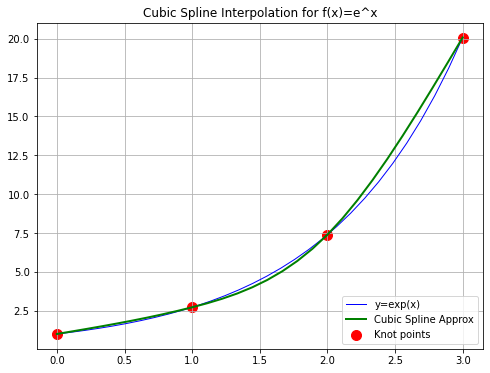

In [43]:
from numpy.core.function_base import linspace
# Try to plot the splines against the function 
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
x = np.linspace(0, 3.0, num=30)
y = np.exp(x)
plt.plot(x,y,label='y=exp(x)',color='blue',linewidth=1 )
plt.plot(cubic_x,cubic_y,label ='Cubic Spline Approx',linewidth=2,color='green')
#knot Points Scatter
x_knot = [0,1,2,3]
y_knot = [1,2.718,7.38,20.08]
plt.scatter(x_knot,y_knot,color='red',s=100,label='Knot points')
leg = plt.legend(loc='lower right')
plt.title("Cubic Spline Interpolation for f(x)=e^x")
plt.grid()
plt.show()